# AirBnB Project for  **Project: Write A Data Science Blog Post**

### 0.1  Key Steps for Project

Feel free to be creative with your solutions, but do follow the CRISP-DM process in finding your solutions.

1) Pick a dataset.
   I chose the AirBnnB dataset.  Because why not..

2) Pose at least three questions related to business or real-world applications of how the data could be used.

3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:
        Gather necessary data to answer your questions
        Handle categorical and missing data
        Provide insight into the methods you chose and why you chose them

    Analyze, Model, and Visualize
        Provide a clear connection between your business questions and how the data answers them.

4) Communicate your business insights:

    Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    Create a blog post to share your questions and insights with a non-technical audience

Your deliverables will be a Github repo and a blog post. Use the rubric here to assist in successfully completing this project!

## 0.2 [Rubric](https://review.udacity.com/#!/rubrics/1507/view)

#### Code Functionality and Readability
* Code is readable (uses good coding practices - PEP8) 
* Code is functional.
* Write code that is well documented and uses functions and classes as necessary.

#### Data
* Project follows the CRISP-DM Process while analyzing their data.
* Proper handling of categorical and missing values in the dataset.
* Categorical variables are handled appropriately for machine learning models (if models are created). 

#### Analysis, Modeling, Visualization
* There are 3-5 business questions answered.
	
#### Github Repository
* Student must publish their code in a public Github repository.
	
#### Blog Post
* Communicate their findings with stakeholders.
* There should be an intriguing title and image related to the project.
* The body of the post has paragraphs that are broken up by appropriate white space and images.
* Each question has a clearly communicated solution.

##  0.3  CRISP-DM
### 0.3.1 Business Understanding/Data Understanding
          AirBnB is an online marketplace for vacation/temporary houseing rentals.  Thier members/hosts own the property and rent via the  AirBnB marketplace.
          
          The data provides was provided each from Seattle and Bostom
          * listing.csv
          * calendar.csv
          * reviews.csv
          
          How to best position your property to make the most revenue?
          1) What time of year is best to make your property availible to get the most money?
          2) Know your capacity?   Waht neighborhoods/property type/property attributes sell better?
          3) What do you need in your profile to garuntee your property is reviewed and reviewed high
          
          
### 0.3.2 Data Preparation
        1) Imported listing and calendar
        2) 
        
        
     
#### 0.3.2.1 Cleaning Data
        * 
### 0.3.3 Modeling
### 0.3.4 Evaluation
### 0.3.5 Deployment

## 1.1 Header

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op

#stats
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import ast
import math
import os
from datetime import date

#Graphing
import seaborn as sns
import matplotlib as plt

#Data modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import pca

In [2]:
PATH = os.getcwd()+"\All Data"
PATH

'C:\\Users\\tcanty\\Documents\\Udacity\\DSND_Term2\\project_files\\AirBnB\\All Data'

In [3]:
os.listdir(PATH)

['.ipynb_checkpoints',
 'b_calendar.csv',
 'b_listings.csv',
 'b_reviews.csv',
 's_calendar.csv',
 's_listings.csv',
 's_reviews.csv']

In [4]:
def clean_listings(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes percentage & currency strings to float
    2) Fixes datatype of oject to categories were appropraite
    3) Fixes bool strings to bool cols
    2) Fixes Datetime cols -> datetime format
    3) There are two columns that have list containing strings, convert to one hot encoded columns 
    4) 
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''

    ## Clean percentage strings to float values
    pct_col = ['host_acceptance_rate','host_response_rate']
    for pc in pct_col:
        df[pc] = df[pc].str.strip("%")
        df[pc] = df[pc].astype('float')
        df[pc] = df[pc].apply(lambda x: x/100)
        #df[pc] = df[pc].map('{:,.2%}'.format)
        
    ## Clean dollar strings to value

    dol_col = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee','extra_people']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        #df[dol] = df[dol].map('${:,.2f}'.format)
        
    ## Change type to category
    cat_col = ['host_response_time','host_location','host_neighbourhood','neighbourhood',
               'neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode',
              'market','smart_location','country_code','country','property_type','room_type',
              'calendar_updated','jurisdiction_names','cancellation_policy','bed_type']
    
    for cc in cat_col:
        df[cc] = df[cc].astype('category')
  

    ## Fix Boolean Columns
    bool_col = ['host_is_superhost','host_has_profile_pic','host_identity_verified',
                'is_location_exact','has_availability','requires_license','instant_bookable',
               'require_guest_profile_picture','require_guest_phone_verification']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    ## Fix Datetime columns
    dt_col = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

    ## Fix list column
    ## The following code transforms column 'host_verification' to a usable matrix of 
    ##     one hot encoding the contained communicaiton methods      
    
    df2 = pd.DataFrame(df['host_verifications'].apply(lambda x:ast.literal_eval(x)))  # string to list #
    df3 = df2.host_verifications.apply(pd.Series)                                   # list -> series across columns #
    df2 = df2.merge(df3, right_index=True, left_index=True)
    df2 = df2.reset_index().melt(id_vars=['id','host_verifications'],value_name = 'host_sm_ver')
    df2 = df2.pivot_table(values='variable',columns='host_sm_ver',index='id',aggfunc='count',fill_value=0)
    df2 = df2.add_prefix('hv_')
    df = df.merge(df2,left_index=True, right_index=True)

    
    
    df4 = pd.DataFrame(df_listing['amenities'].apply(lambda x:
                           x.replace('\"','').replace('{','').replace('}','').split(',')))
    df5 = df4.iloc[:,0].apply(pd.Series)
    df4 = df4.merge(df5,left_index=True,right_index=True)
    df4 = df4.reset_index().melt(id_vars=['id','amenities'],value_name = 'amms')
    df4 = df4.pivot_table(values='variable',columns='amms',index='id',aggfunc='count',fill_value=0)
    df4 = df4.add_prefix('amm_')
    df = df.merge(df4,left_index=True, right_index=True)
    
    ## Remaining string columns, only interested in the presence or absence.   Replace with boolean. 
    
    
    str_cols = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
   'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about']
    
    def replace_str(x):
        if type(x) == float:
            if  math.isnan(x):
                return False
        else: return True
    
    df_listed_attributes = pd.DataFrame()
    for col in str_cols:
        df_listed_attributes[col] = df[col].apply(lambda x: replace_str(x))
        df_listed_attributes[col] = df_listed_attributes[col].astype('bool')
    
    df_listed_attributes = df_listed_attributes.add_prefix('attr_')
    df = df.merge(df_listed_attributes,left_index=True,right_index=True)
    df = df.drop(columns=str_cols)
    
    
    ## Drop Columns
    '''Reasons
    All N/A: licence
    No N/A: listing_url
    onehot: host_verifications
    am
       
    '''
    drop_cols = ['license','host_verifications','amenities']  
    df = df.drop(columns=drop_cols)
    return df


In [5]:
def clean_cal(df):
    ''' Return a cleaned dataframe derived from listing.csv file

    1) Fixes Datetime cols -> datetime format
    2) Fixes percentage strings to float
    3) Fixes bool strings to bool cols
    4) Fixes datatype of oject to categories were appropraite
    5) 

    Parameters
    -------
    df:  Pandas DataFrame with an already imported lsiting.csv

    '''
    dol_col= ['price']
    for dol in dol_col:
        df[dol] = df[dol].str.replace('$','')
        df[dol] = df[dol].str.replace(',','')
        df[dol] = df[dol].astype('float')
        
    ## Fix Datetime columns
    dt_col = ['date']
    for dt in dt_col:
        df[dt] = pd.to_datetime(df[dt])

        
    ## Expand Datetime
    df['week_num'] = df['date'].apply(lambda x: date.isocalendar(x)[1])
    df['month'] = df['date'].apply(lambda x: x.month)
    df['year'] = df['date'].apply(lambda x: x.year)
    
    ## Fix Bool Columns

    bool_col = ['available']
    for bc in bool_col:
        df[bc] = df[bc].replace({'t': True,'f':False})
        df[bc] = df[bc].astype(bool)

    
    
    
    return df

In [6]:
df_listing = pd.read_csv(PATH+'\s_listings.csv',index_col=0)

In [7]:
df_cal = pd.read_csv(PATH+'\s_calendar.csv',index_col=0)

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
df_listing = clean_listings(df_listing)

In [9]:
df_cal = clean_cal(df_cal)

### Q1.What time of year is best to make your property availible to get the most money?

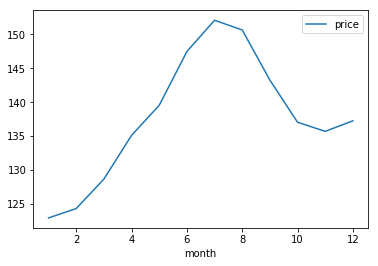

In [10]:
pd.DataFrame(df_cal.groupby(['month'])['price'].mean()).plot()

import matplotlib.pyplot as plt

C:\Users\tcanty\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


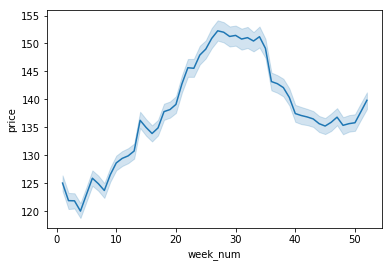

In [11]:
ax1 = sns.lineplot(x=df_cal['week_num'],y=df_cal['price'])

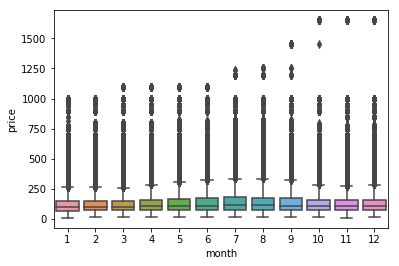

In [12]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],)

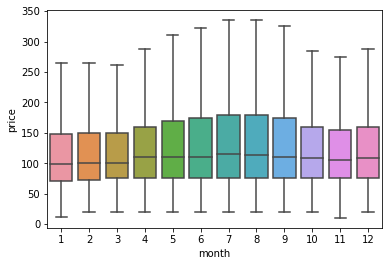

In [13]:
ax1 = sns.boxplot(y=df_cal['price'],x=df_cal['month'],showfliers=False)

In [14]:
mod = ols('price ~ month',data=df_cal).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq        df            F  PR(>F)
month     1.808500e+07       1.0  1641.275915     0.0
Residual  1.029757e+10  934540.0          NaN     NaN


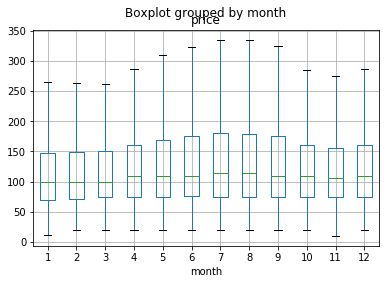

In [15]:
#Create a boxplot
df_cal.boxplot('price', by='month', figsize=(6, 4),showfliers=False)

# !!Do ANOVA to see if there is any significant difference between months
# Create side by side boxplot and week number graph

## END OF QUESTION 1

Question 2:  Know your capacity?   Waht neighborhoods/property type/property attributes sell better?

In [16]:
def compile_and_clean_attr_data(df_list,df_cal):
    
    
    
    #Using the average list prices in df_cal['price'] vs the current listing price df_list['price']
    df_avg_price = pd.DataFrame(df_cal.groupby(by=['listing_id'])['price'].mean())
    df_list = df_list.drop(columns='price')
    
    
    df = df_avg_price.merge(df_list,left_index=True,right_index=True)
    
    #Strip Xs down to the property/physical attributes of the property
    ammenities = list(df.filter(like='amm').columns.values)
    physical_attr_loc = ['price','bathrooms','bedrooms','beds','neighbourhood_cleansed',
                     'neighbourhood_group_cleansed','property_type','room_type','bed_type',
                    'accommodates','guests_included'] + ammenities
    
    df = df[physical_attr_loc]
    ##Clean Nas 
    
    # Drop all rows without a y (price)
    df = df.dropna(axis=0,subset=['price'])
    
    # Dropping rows b/c The following had a low number of n/a rows and would be difficult to impute, 
    df = df.drop(index=df.loc[df['bedrooms'].isna(),:].index )
    df = df.drop(index=df.loc[df['property_type'].isna(),:].index )
    df = df.drop(index=df.loc[df['bathrooms'].isna(),:].index )
    
    
    #Creating a log-transformed price column to 
    df.insert(column='price_log',loc=1,value=np.nan)
    df['price_log'] = df['price'].apply(lambda x: np.log(x))
    
    # One hot encode the categorical columns
    cat_col = list(df.select_dtypes(include='category').columns.values)
    df = df.merge(pd.get_dummies(df[cat_col],prefix_sep='::'),right_index=True, left_index=True)
    df = df.drop(columns=cat_col)
    
    #Standardize
    std_col = ['price','price_log']
    
    #Normalize
    norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']
    
    return df

In [17]:
df_q2 = compile_and_clean_attr_data(df_listing,df_cal)

In [18]:
df_q2.loc[:,df_q2.isna().any()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 4291 to 10340165
Empty DataFrame

In [19]:
df_q2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 4291 to 10340165
Columns: 177 entries, price to bed_type::Real Bed
dtypes: float64(5), int64(44), uint8(128)
memory usage: 2.0 MB


In [20]:
df_q2.select_dtypes(include='float').head().iloc[:,:]

,price,price_log,bathrooms,bedrooms,beds
4291,82.000000,4.406719,1.0,1.0,1.0
5682,53.944984,3.987965,1.0,1.0,1.0
6606,92.849315,4.530978,1.0,1.0,1.0
7369,85.000000,4.442651,1.0,1.0,1.0
9419,85.616438,4.449877,3.0,1.0,1.0


In [21]:
#Standardize
std_col = ['price','price_log']
blah = StandardScaler()

In [22]:
df_q2[std_col] = blah.fit_transform(df_q2[std_col])

In [23]:
#Normalize
norm_col = ['accommodates','guests_included','bathrooms','bedrooms','beds']

In [24]:
df_q2[norm_col] = normalize(df_q2[norm_col])

In [25]:
df_q2_X = df_q2.drop(columns=['price','price_log'])
df_q2_y1 = df_q2['price']
df_q2_y2 = df_q2['price_log']

In [26]:
q2_model = LinearRegression()

In [27]:
q2_log_model = LinearRegression()

In [28]:
q2_X_train, q2_X_test, q2_y1_train, q2_y1_test, q2_y2_train, q2_y2_test = train_test_split(df_q2_X,df_q2_y1,df_q2_y2,test_size = 0.3,random_state=72)

In [29]:
q2_model.fit(q2_X_train,q2_y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
q2_log_model.fit(q2_X_train,q2_y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
q2_y1_predict = q2_model.predict(q2_X_test)

In [32]:
q2_y2_predict = q2_log_model.predict(q2_X_test)

In [33]:
r2_score(q2_y1_test,q2_y1_predict)

-3.475602644236462e+20

In [34]:
r2_score(q2_y2_test,q2_y2_predict)

-3.39906762033953e+19

In [66]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = q2_X_train.columns
coefs_df['coefs'] = q2_model.coef_
coefs_df['abs_coefs'] = np.abs(q2_model.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df[0:15]

,est_int,coefs,abs_coefs
167,room_type::Entire home/apt,7.761469e+12,7.761469e+12
168,room_type::Private room,7.761469e+12,7.761469e+12
169,room_type::Shared room,7.761469e+12,7.761469e+12
140,neighbourhood_group_cleansed::Downtown,-8.310245e+11,8.310245e+11
145,neighbourhood_group_cleansed::Other neighborhoods,-7.681653e+11,7.681653e+11
144,neighbourhood_group_cleansed::Northgate,-7.458055e+11,7.458055e+11
135,neighbourhood_group_cleansed::Beacon Hill,-6.999098e+11,6.999098e+11
136,neighbourhood_group_cleansed::Capitol Hill,-5.951270e+11,5.951270e+11
83,neighbourhood_cleansed::Lawton Park,-5.773004e+11,5.773004e+11
53,neighbourhood_cleansed::Briarcliff,-5.773004e+11,5.773004e+11


In [65]:
coefs_df.insert(1,'type','')
coefs_df['type']=coefs_df['est_int'].apply(lambda x: x.split('::')[0])
coefs_df.groupby(by='type')['abs_coefs'].mean().sort_values(ascending=False)ll;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;

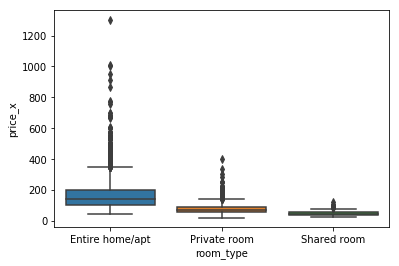

In [49]:
ax1 = sns.boxplot(x=df_data_p['room_type'],y=df_data_p['price_x'])

In [50]:
prop_type = list(df_data_p['property_type'].unique())

[Text(0, 0, 'Boat'),
 Text(0, 0, 'Condominium'),
 Text(0, 0, 'Loft'),
 Text(0, 0, 'House'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'Chalet'),
 Text(0, 0, 'Townhouse'),
 Text(0, 0, 'Camper/RV'),
 Text(0, 0, 'Bungalow'),
 Text(0, 0, 'Bed & Breakfast'),
 Text(0, 0, 'Cabin'),
 Text(0, 0, 'Yurt'),
 Text(0, 0, 'Treehouse'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Tent'),
 Text(0, 0, 'Dorm')]

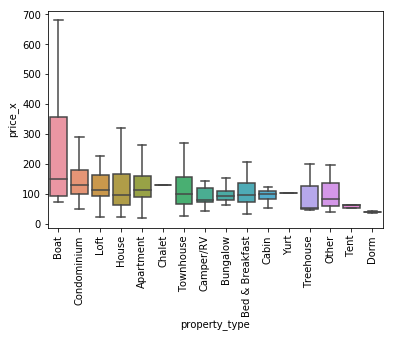

In [133]:
pt_labels = list(df_data_p.groupby(by='property_type')['price_x'].mean().sort_values(ascending=False).index)
ax2 = sns.boxplot(x=df_data_p['property_type'],y=df_data_p['price_x'],order=pt_labels,showfliers=False)
ax2.set_xticklabels(labels=pt_labels,rotation=90)

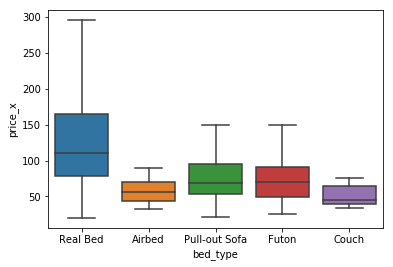

In [94]:
bt_labels = list(df_data_p.groupby(by='bed_type')['price_x'].mean().sort_values(ascending=False).index)
ax3 = sns.boxplot(x=df_data_p['bed_type'],y=df_data_p['price_x'],order=bt_labels,showfliers=False)

[Text(0,0,'Magnolia'),
 Text(0,0,'Downtown'),
 Text(0,0,'Queen Anne'),
 Text(0,0,'West Seattle'),
 Text(0,0,'Cascade'),
 Text(0,0,'Capitol Hill'),
 Text(0,0,'Central Area'),
 Text(0,0,'Ballard'),
 Text(0,0,'Other neighborhoods'),
 Text(0,0,'Interbay'),
 Text(0,0,'Seward Park'),
 Text(0,0,'University District'),
 Text(0,0,'Beacon Hill'),
 Text(0,0,'Rainier Valley'),
 Text(0,0,'Lake City'),
 Text(0,0,'Northgate'),
 Text(0,0,'Delridge')]

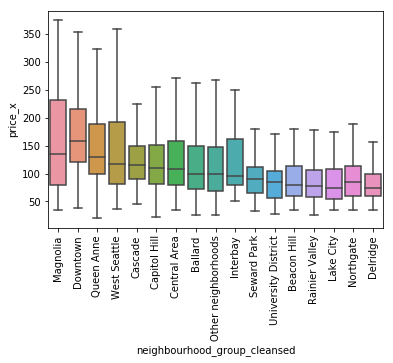

In [105]:
n_label = list(df_data_p.groupby(by='neighbourhood_group_cleansed')['price_x'].mean().sort_values(ascending=False).index)
ax4 = sns.boxplot(x=df_data_p['neighbourhood_group_cleansed'],y=df_data_p['price_x'],order=n_label,showfliers=False)
ax4.set_xticklabels(labels=n_label,rotation=90)

[Text(0,0,'Magnolia'),
 Text(0,0,'Downtown'),
 Text(0,0,'Queen Anne'),
 Text(0,0,'West Seattle'),
 Text(0,0,'Cascade'),
 Text(0,0,'Capitol Hill'),
 Text(0,0,'Central Area'),
 Text(0,0,'Ballard'),
 Text(0,0,'Other neighborhoods'),
 Text(0,0,'Interbay'),
 Text(0,0,'Seward Park'),
 Text(0,0,'University District'),
 Text(0,0,'Beacon Hill'),
 Text(0,0,'Rainier Valley'),
 Text(0,0,'Lake City'),
 Text(0,0,'Northgate'),
 Text(0,0,'Delridge')]

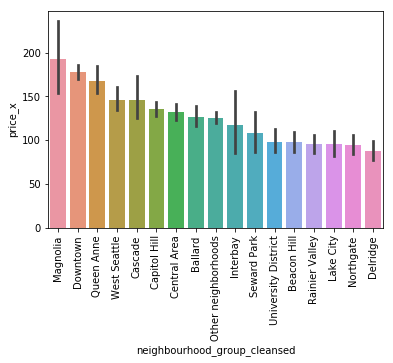

In [114]:
ax5= sns.barplot(x=df_data_p['neighbourhood_group_cleansed'],y=df_data_p['price_x'],order=n_label);ax5.set_xticklabels(labels=n_label,rotation=90)

[Text(0,0,'Magnolia'),
 Text(1,0,'Downtown'),
 Text(2,0,'Queen Anne'),
 Text(3,0,'West Seattle'),
 Text(4,0,'Cascade'),
 Text(5,0,'Capitol Hill'),
 Text(6,0,'Central Area'),
 Text(7,0,'Ballard'),
 Text(8,0,'Other neighborhoods'),
 Text(9,0,'Interbay'),
 Text(10,0,'Seward Park'),
 Text(11,0,'University District'),
 Text(12,0,'Beacon Hill'),
 Text(13,0,'Rainier Valley'),
 Text(14,0,'Lake City'),
 Text(15,0,'Northgate'),
 Text(16,0,'Delridge')]

In [68]:
grid = plt.gridspec.GridSpec(2,3)

In [71]:
fig = plt.figure.Figure(figsize=(6, 6))
grid = plt.gridspec.GridSpec(2, 3, hspace=0.2, wspace=0.2)

In [2]:
#### NOTE - Need to standardize price and normalize other features (i.e bedrooms ) for model analysis

In [ ]:
## try to log transform price data to unskew.